## Fake News Classifier
Dataset:  https://www.kaggle.com/c/fake-news/data#

In [68]:
import pandas as pd

In [6]:
df=pd.read_csv('fake-news/train.csv')

In [7]:
df.shape

(20800, 5)

In [8]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
X=df
X.drop(['label'], axis=1)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [14]:
y=df['label']

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

In [19]:
df=df.dropna()

In [21]:
df.shape

(18285, 5)

In [22]:
msgs=df.copy()

In [23]:
msgs.reset_index(inplace=True)

In [26]:
msgs.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [27]:
msgs.shape

(18285, 6)

In [28]:
len(msgs)

18285

In [31]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [32]:
corpus=[]
ps=PorterStemmer()
for i in range(0,len(msgs)):
    review=re.sub('[^a-zA-Z]',' ', msgs['title'][i])
    review=review.lower()
    review=review.split()
    
    review=[ps.stem(words) for words in review if words not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [33]:
cv=CountVectorizer(max_features=5000, ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [34]:
X.shape

(18285, 5000)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, msgs['label'], test_size=0.3, random_state=0)

In [37]:
X_train.shape, X_test.shape

((12799, 5000), (5486, 5000))

In [44]:
len(cv.get_feature_names())

5000

In [46]:
cv.get_feature_names()[:5]

['abandon', 'abc', 'abc news', 'abduct', 'abe']

In [47]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [50]:
count_df=pd.DataFrame(X_train, columns=cv.get_feature_names())

In [51]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
len(count_df.columns)

5000

In [53]:
import matplotlib.pyplot as plt

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Naive Bayes Algo

In [55]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [56]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


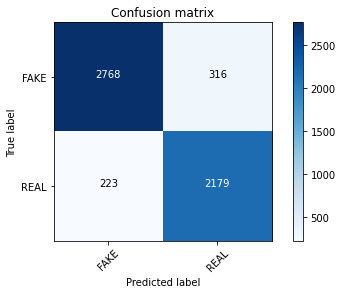

In [58]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## Passive  Aggressive Classifier Algo

In [60]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.914
Confusion matrix, without normalization


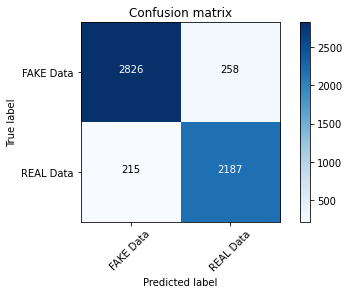

In [61]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

## Naive Bayes with HyperParameter

In [62]:
classifier=MultinomialNB(alpha=0.1)

In [63]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/home/ajay/.local/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8904484141450966
Alpha: 0.1, Score : 0.9030258840685381
Alpha: 0.2, Score : 0.9030258840685381
Alpha: 0.30000000000000004, Score : 0.9026613197229311
Alpha: 0.4, Score : 0.9019321910317171
Alpha: 0.5, Score : 0.9024790375501276
Alpha: 0.6000000000000001, Score : 0.9028436018957346
Alpha: 0.7000000000000001, Score : 0.9035727305869486
Alpha: 0.8, Score : 0.9030258840685381
Alpha: 0.9, Score : 0.9032081662413416


In [64]:
## Get Features names
feature_names = cv.get_feature_names()

In [65]:
classifier.coef_[0]

array([ -9.13851551,  -8.66088795,  -9.13851551, ..., -10.83311123,
        -8.7962293 ,  -9.36677416])

In [66]:
### Most real      that has less negative value
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.9920894686099926, 'trump'),
 (-4.283778449404154, 'hillari'),
 (-4.375295545839294, 'clinton'),
 (-4.8873997935153906, 'elect'),
 (-5.144630412704637, 'new'),
 (-5.239226293337629, 'comment'),
 (-5.272857037363478, 'video'),
 (-5.400360096919867, 'war'),
 (-5.400360096919867, 'us'),
 (-5.400360096919867, 'hillari clinton'),
 (-5.434948525093684, 'fbi'),
 (-5.450146386003116, 'vote'),
 (-5.535349569997123, 'email'),
 (-5.592540682275724, 'world'),
 (-5.628494225203827, 'obama'),
 (-5.717782305845059, 'donald'),
 (-5.751706861626975, 'donald trump'),
 (-5.7656056260177895, 'russia'),
 (-5.868713801008469, 'day'),
 (-5.868713801008469, 'america')]

In [67]:
### Most fake    that has high negative values
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.833111226611438, 'abe'),
 (-10.833111226611438, 'abroad'),
 (-10.833111226611438, 'abus new'),
 (-10.833111226611438, 'abus new york'),
 (-10.833111226611438, 'act new'),
 (-10.833111226611438, 'act new york'),
 (-10.833111226611438, 'advic'),
 (-10.833111226611438, 'advis new'),
 (-10.833111226611438, 'advis new york'),
 (-10.833111226611438, 'age new'),
 (-10.833111226611438, 'age new york'),
 (-10.833111226611438, 'agenda breitbart'),
 (-10.833111226611438, 'ail'),
 (-10.833111226611438, 'aleppo new'),
 (-10.833111226611438, 'aleppo new york'),
 (-10.833111226611438, 'ali'),
 (-10.833111226611438, 'america breitbart'),
 (-10.833111226611438, 'america new york'),
 (-10.833111226611438, 'american breitbart'),
 (-10.833111226611438, 'american new'),
 (-10.833111226611438, 'american new york'),
 (-10.833111226611438, 'ami'),
 (-10.833111226611438, 'ami schumer'),
 (-10.833111226611438, 'amp'),
 (-10.833111226611438, 'applaud'),
 (-10.833111226611438, 'arson'),
 (-10.83311122661143